# SENTIMENT INDEX

In [2]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
# load pickles
# import pickles 
stocks_pkl = open("stocks.pkl", "rb")
stocks = pickle.load(stocks_pkl)

tweet_sent_pkl = open("stock_tweet_sentiment.pkl", "rb")
tweets = pickle.load(tweet_sent_pkl)

reviews_pkl = open("reviews.pkl", "rb")
ratings = pickle.load(reviews_pkl)

news_sent_pkl = open("news_sent.pkl", "rb")
news = pickle.load(news_sent_pkl)

## Make final dataframe

In [4]:
# rename columns and reformat date
tweets.sort_values(by="Date",inplace=True)
tweets.rename(columns={"Value":"Stock_Price","Sentiment":"Tweet_Sentiment"},inplace=True)

ratings.rename(columns={"date":"Date", "rating":"Employee_Sentiment"},inplace=True)

news["Date"] = pd.to_datetime(news["Date"])

In [5]:
# merge on tweets and stock dataframe 
sent_idx = tweets.merge(ratings, how="outer")
sent_idx = news.merge(sent_idx, how="outer")
sent_idx.head()

,Date,News_Sentiment,Tweet_Sentiment,Stock_Price,Employee_Sentiment
0,2010-06-22,-0.2960,NaN,NaN,NaN
1,2012-05-31,0.4939,NaN,NaN,NaN
2,2012-06-25,0.0000,NaN,NaN,NaN
3,2012-08-03,0.0000,NaN,NaN,NaN
4,2012-10-23,0.3818,NaN,NaN,NaN


In [6]:
# sort by date
sent_idx.sort_values(by="Date", inplace=True)

In [7]:
sent_idx.tail()

,Date,News_Sentiment,Tweet_Sentiment,Stock_Price,Employee_Sentiment
8077,2019-08-18,NaN,NaN,NaN,4.0
8080,2019-08-19,NaN,NaN,NaN,4.0
8081,2019-08-19,NaN,NaN,NaN,1.0
8079,2019-08-19,NaN,NaN,NaN,1.0
8082,2019-08-20,NaN,NaN,NaN,5.0


In [8]:
# reset index
sent_idx = sent_idx.reset_index()
sent_idx.drop(columns=["index"])
sent_idx.tail()

,index,Date,News_Sentiment,Tweet_Sentiment,Stock_Price,Employee_Sentiment
8078,8077,2019-08-18,NaN,NaN,NaN,4.0
8079,8080,2019-08-19,NaN,NaN,NaN,4.0
8080,8081,2019-08-19,NaN,NaN,NaN,1.0
8081,8079,2019-08-19,NaN,NaN,NaN,1.0
8082,8082,2019-08-20,NaN,NaN,NaN,5.0


In [9]:
# limit until 2017
sent_idx = sent_idx[sent_idx["Date"].dt.year < 2018]
sent_idx.tail(50)

,index,Date,News_Sentiment,Tweet_Sentiment,Stock_Price,Employee_Sentiment
6613,6652,2017-11-22,NaN,NaN,NaN,2.0
6614,6654,2017-11-25,NaN,NaN,NaN,5.0
6615,6653,2017-11-25,NaN,NaN,NaN,4.0
6616,494,2017-11-26,0.3818,NaN,NaN,5.0
6617,6655,2017-11-27,NaN,NaN,NaN,2.0
6618,6657,2017-11-28,NaN,NaN,NaN,4.0
6619,6658,2017-11-28,NaN,NaN,NaN,3.0
6620,6656,2017-11-28,NaN,NaN,NaN,4.0
6621,6659,2017-11-28,NaN,NaN,NaN,1.0
6622,6661,2017-11-28,NaN,NaN,NaN,3.0


In [10]:
# fill nans with previous values and start nans with future values 
sent_idx.fillna(method="ffill", inplace=True)
sent_idx.fillna(method="bfill", inplace=True)
sent_idx.isna().any()

index                 False
Date                  False
News_Sentiment        False
Tweet_Sentiment       False
Stock_Price           False
Employee_Sentiment    False
dtype: bool

In [11]:
# rescale employee sentiment 
sent_idx["Employee_Sentiment"] = sent_idx["Employee_Sentiment"].astype(str)
scaled_sent = {"1.0":"-1", "2.0":"-.5", "3.0":"0", "4.0":".5", "5.0":"1"}
sent_idx.replace({"Employee_Sentiment":scaled_sent},inplace=True)
sent_idx["Employee_Sentiment"] = (sent_idx["Employee_Sentiment"]).astype(float)
sent_idx.head()

,index,Date,News_Sentiment,Tweet_Sentiment,Stock_Price,Employee_Sentiment
0,0,2010-06-22,-0.2960,0.4199,32.52,0.5
1,6529,2012-04-02,-0.2960,0.4199,32.52,0.5
2,1,2012-05-31,0.4939,0.4199,32.52,0.5
3,2,2012-06-25,0.0000,0.4199,32.52,0.5
4,6530,2012-06-28,0.0000,0.4199,32.52,0.0


In [12]:
# drop first 2010 row 
sent_idx.drop([0], inplace=True)

In [13]:
# make total sentiment column with average
sent_idx["Average_Sentiment"] = (sent_idx["News_Sentiment"] + sent_idx["Tweet_Sentiment"] + sent_idx["Employee_Sentiment"]) / 3
sent_idx.head()

,index,Date,News_Sentiment,Tweet_Sentiment,Stock_Price,Employee_Sentiment,Average_Sentiment
1,6529,2012-04-02,-0.2960,0.4199,32.52,0.5,0.207967
2,1,2012-05-31,0.4939,0.4199,32.52,0.5,0.471267
3,2,2012-06-25,0.0000,0.4199,32.52,0.5,0.306633
4,6530,2012-06-28,0.0000,0.4199,32.52,0.0,0.139967
5,6531,2012-07-24,0.0000,0.4199,32.52,0.0,0.139967


In [14]:
# reset index
sent_idx.reset_index(inplace=True)
sent_idx.drop(columns=["index"],inplace=True)

In [15]:
# rearrange columns 
cols = ["Date", "Tweet_Sentiment", "News_Sentiment", "Employee_Sentiment", "Average_Sentiment", "Stock_Price"]
sent_idx = sent_idx[cols]

## EDA

In [16]:
sent_idx.head()

,Date,Tweet_Sentiment,News_Sentiment,Employee_Sentiment,Average_Sentiment,Stock_Price
0,2012-04-02,0.4199,-0.2960,0.5,0.207967,32.52
1,2012-05-31,0.4199,0.4939,0.5,0.471267,32.52
2,2012-06-25,0.4199,0.0000,0.5,0.306633,32.52
3,2012-06-28,0.4199,0.0000,0.0,0.139967,32.52
4,2012-07-24,0.4199,0.0000,0.0,0.139967,32.52


In [17]:
# change df name 
df = sent_idx.copy()

### Average Sentiment vs Stock Price

In [18]:
from scipy.ndimage.filters import gaussian_filter1d

In [19]:
# initial plot 
x = df["Date"]
y1 = df["Average_Sentiment"]
y2 = df["Tweet_Sentiment"]
y3 = df["News_Sentiment"]
y4 = df["Employee_Sentiment"]
z = df["Stock_Price"]

/Users/biancapery/Library/Python/3.7/lib/python/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


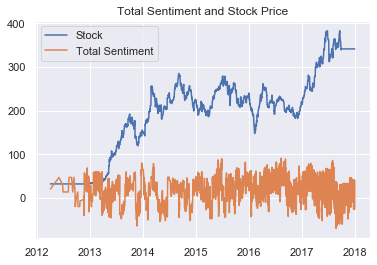

In [20]:
# graph without averaging
sns.set()
plt.title("Total Sentiment and Stock Price")
plt.plot(x, z, label="Stock")
plt.plot(x, y1 * 100, label="Total Sentiment")
plt.legend(loc='upper left');

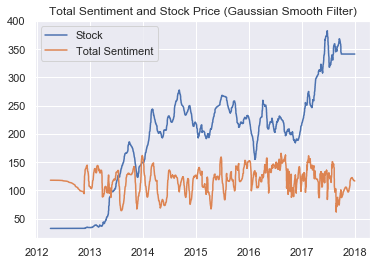

In [21]:
# graph smoothed lines
y1smoothed = gaussian_filter1d(y1 * 100 +100, sigma=10)
zsmoothed = gaussian_filter1d(z, sigma=10)
plt.title("Total Sentiment and Stock Price (Gaussian Smooth Filter)")
plt.plot(x, zsmoothed, label="Stock")
plt.plot(x, y1smoothed, label="Total Sentiment")
plt.legend(loc='upper left')
plt.show();

#### Monthly rolling average 

In [22]:
# average by month
sent_month = pd.DataFrame(df.set_index('Date').groupby(pd.Grouper(freq='M')).mean()).reset_index()

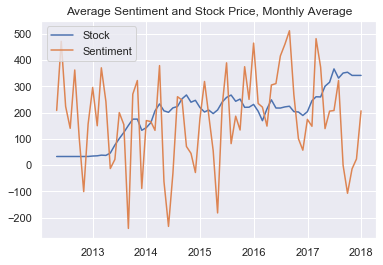

In [23]:
x = sent_month["Date"]
y1 = sent_month["Average_Sentiment"]
z = sent_month["Stock_Price"]

sns.set()
plt.title("Average Sentiment and Stock Price, Monthly Average")
plt.plot(x, z, label="Stock")
plt.plot(x, y1*1000, label="Sentiment")
plt.legend(loc='upper left');

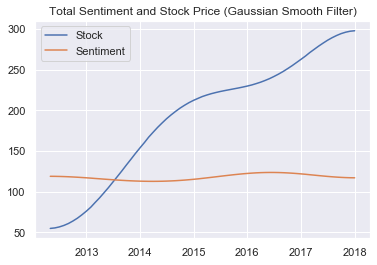

In [24]:
# graph smoothed lines
y1smoothed = gaussian_filter1d(y1 * 100 +100, sigma=10)
zsmoothed = gaussian_filter1d(z, sigma=10)
plt.title("Total Sentiment and Stock Price (Gaussian Smooth Filter)")
plt.plot(x, zsmoothed, label="Stock")
plt.plot(x, y1smoothed, label="Sentiment")
plt.legend(loc='upper left')
plt.show();

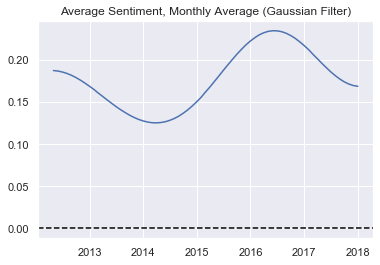

In [25]:
# graph smoothed lines
plt.title("Average Sentiment, Monthly Average (Gaussian Filter)")
y1smoothed = gaussian_filter1d(y1, sigma=10)
plt.plot(x, y1smoothed)
plt.axhline(y=0, color='black', linestyle='dashed')
# plt.plot(x, ) 

plt.show()

### Tweet Sentiment vs Stock Price

In [26]:
# initial plot 
x = df["Date"]
y1 = df["Average_Sentiment"]
y2 = df["Tweet_Sentiment"]
y3 = df["News_Sentiment"]
y4 = df["Employee_Sentiment"]
z = df["Stock_Price"]

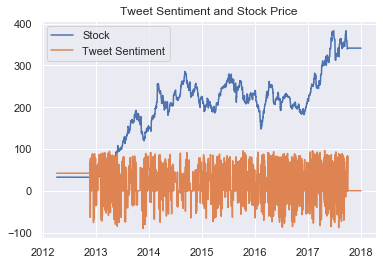

In [27]:
# graph without averaging
sns.set()
plt.title("Tweet Sentiment and Stock Price")
plt.plot(x, z, label="Stock")
plt.plot(x, y2 * 100, label="Tweet Sentiment")
plt.legend(loc='upper left');

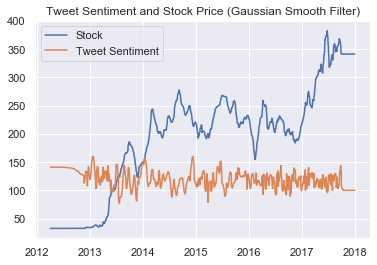

In [28]:
# graph smoothed lines
y2smoothed = gaussian_filter1d(y2 * 100 +100, sigma=10)
zsmoothed = gaussian_filter1d(z, sigma=10)
plt.title("Tweet Sentiment and Stock Price (Gaussian Smooth Filter)")
plt.plot(x, zsmoothed, label="Stock")
plt.plot(x, y2smoothed, label="Tweet Sentiment")
plt.legend(loc='upper left')
plt.show();

#### Monthly rolling average 

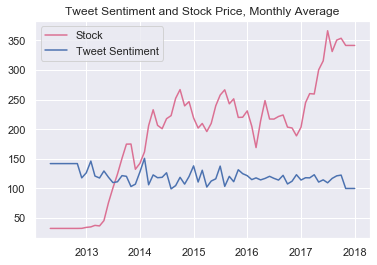

In [46]:
x = sent_month["Date"]
y2 = sent_month["Tweet_Sentiment"]
z = sent_month["Stock_Price"]

sns.set()
plt.title("Tweet Sentiment and Stock Price, Monthly Average")
plt.plot(x, z, label="Stock", color="palevioletred")
plt.plot(x, y2*100+100, label="Tweet Sentiment")
plt.legend(loc='upper left');

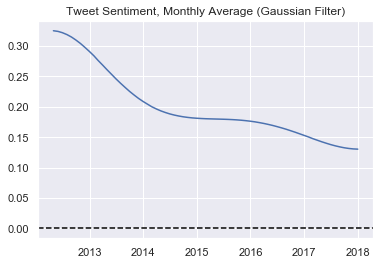

In [30]:
# graph smoothed lines
plt.title("Tweet Sentiment, Monthly Average (Gaussian Filter)")
y2smoothed = gaussian_filter1d(y2, sigma=10)
plt.plot(x, y2smoothed)
plt.axhline(y=0, color='black', linestyle='dashed')
# plt.plot(x, ) 

plt.show()

### Employee Sentiment vs Stock Price

In [31]:
# initial plot 
x = df["Date"]
y1 = df["Average_Sentiment"]
y2 = df["Tweet_Sentiment"]
y3 = df["News_Sentiment"]
y4 = df["Employee_Sentiment"]
z = df["Stock_Price"]

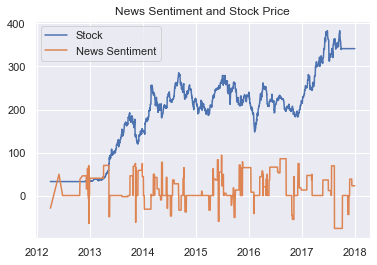

In [32]:
# graph without averaging
sns.set()
plt.title("News Sentiment and Stock Price")
plt.plot(x, z, label="Stock")
plt.plot(x, y3 * 100, label="News Sentiment")
plt.legend(loc='upper left');

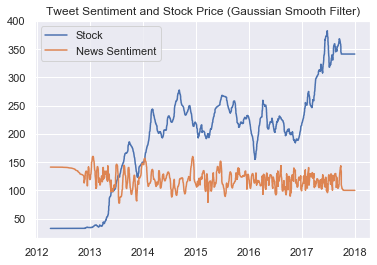

In [33]:
# graph smoothed lines
y3smoothed = gaussian_filter1d(y2 * 100 +100, sigma=10)
zsmoothed = gaussian_filter1d(z, sigma=10)
plt.title("Tweet Sentiment and Stock Price (Gaussian Smooth Filter)")
plt.plot(x, zsmoothed, label="Stock")
plt.plot(x, y3smoothed, label="News Sentiment")
plt.legend(loc='upper left')
plt.show();

#### Monthly rolling average 

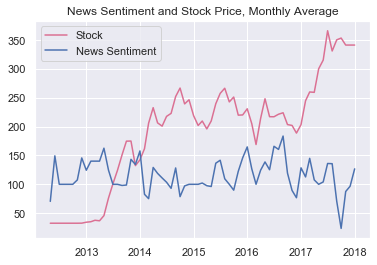

In [45]:
x = sent_month["Date"]
y3 = sent_month["News_Sentiment"]
z = sent_month["Stock_Price"]

sns.set()
plt.title("News Sentiment and Stock Price, Monthly Average")
plt.plot(x, z, label="Stock", color="palevioletred")
plt.plot(x, y3*100+100, label="News Sentiment")
plt.legend(loc='upper left');

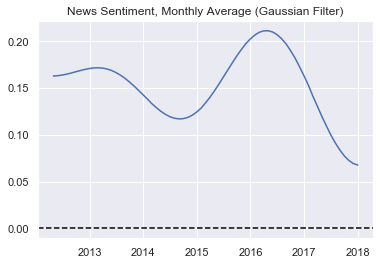

In [35]:
# graph smoothed lines
plt.title("News Sentiment, Monthly Average (Gaussian Filter)")
y3smoothed = gaussian_filter1d(y3, sigma=10)
plt.plot(x, y3smoothed)
plt.axhline(y=0, color='black', linestyle='dashed')
# plt.plot(x, ) 

plt.show()

## Employee Sentiment and Stock Price

In [36]:
# initial plot 
x = df["Date"]
y1 = df["Average_Sentiment"]
y2 = df["Tweet_Sentiment"]
y3 = df["News_Sentiment"]
y4 = df["Employee_Sentiment"]
z = df["Stock_Price"]

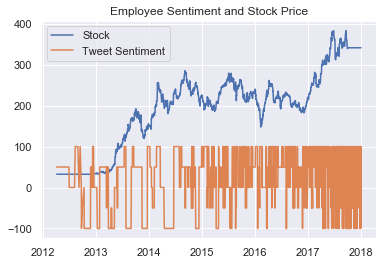

In [37]:
# graph without averaging
sns.set()
plt.title("Employee Sentiment and Stock Price")
plt.plot(x, z, label="Stock")
plt.plot(x, y4 * 100, label="Tweet Sentiment")
plt.legend(loc='upper left');

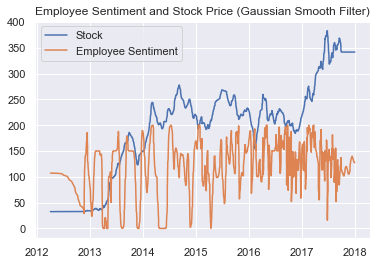

In [38]:
# graph smoothed lines
y4smoothed = gaussian_filter1d(y4 * 100 +100, sigma=10)
zsmoothed = gaussian_filter1d(z, sigma=10)
plt.title("Employee Sentiment and Stock Price (Gaussian Smooth Filter)")
plt.plot(x, zsmoothed, label="Stock")
plt.plot(x, y4smoothed, label="Employee Sentiment")
plt.legend(loc='upper left')
plt.show();

#### Monthly rolling average 

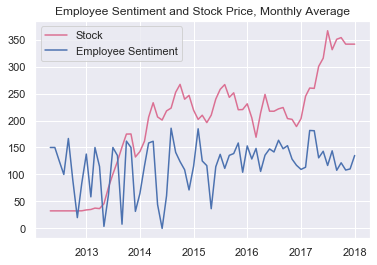

In [44]:
x = sent_month["Date"]
y4 = sent_month["Employee_Sentiment"]
z = sent_month["Stock_Price"]

sns.set()
plt.title("Employee Sentiment and Stock Price, Monthly Average",)
plt.plot(x, z, label="Stock", color="palevioletred")
plt.plot(x, y4*100+100, label="Employee Sentiment")
plt.legend(loc='upper left');

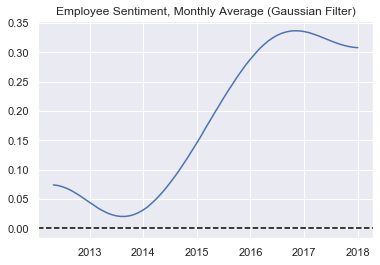

In [40]:
# graph smoothed lines
plt.title("Employee Sentiment, Monthly Average (Gaussian Filter)")
y4smoothed = gaussian_filter1d(y4, sigma=10)
plt.plot(x, y4smoothed)
plt.axhline(y=0, color='black', linestyle='dashed')

plt.show()

### Comprehensive graph

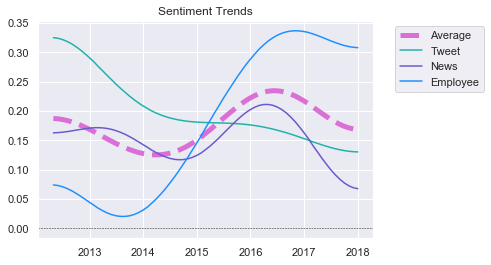

In [41]:
plt.plot(x, y1smoothed, linewidth=5.0, linestyle='dashed', label="Average", color="orchid")
plt.plot(x, y2smoothed, label = "Tweet", color="lightseagreen")
plt.plot(x, y3smoothed, label = "News", color="slateblue")
plt.plot(x, y4smoothed, label = "Employee", color="dodgerblue")
plt.title("Sentiment Trends")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.axhline(y=0, color='black', linewidth=.5, linestyle='dashed');

Do this with the daily rolling average instead.

In [42]:
! ls

News Headline Scraping and Analysis.ipynb
News, Tweets and Stocks.ipynb
Reviews Scraping and Analysis.ipynb
Sentdex Scraping and Analysis.ipynb
Sentiment Index Dataframes.ipynb
Sentiment and Stock Spikes.ipynb
Tesla Sentiment Index Final.ipynb
Tesla Sentiment Index.ipynb
Topic Modeling EDA.ipynb
Tweets Sentiment and Stocks Analysis.ipynb
Tweets data cleaning and EDA.ipynb
__pycache__
news.pkl
news_sent.pkl
news_sent_all.pkl
news_stock.csv
reviews.pkl
reviews_sent.pkl
sent_df.csv
sent_idx.pkl
sentidx_df.csv
small_df.csv
spike_tableau.csv
stock_tweet_sentiment.pkl
stocks.pkl
tweets.pkl
tweets_sent.pkl
